# Semianr 6 - Combinatoris, Graph, Boolean Logic

## Generating Funciton with SymPy


**Generating Function:** In mathematic, a generating function is a way of encoding an infinite sequence of numbers by treating them as the coefficients of a formula power series. This series is called the generating function of the sequence.

In [1]:
## loading python libraries
# necessary to display plots inline:
%matplotlib inline

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing
from pylab import *
from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy           # package for symbolic computation
from sympy import *

## Basics of generating functinos

[About SymPy](https://www.sympy.org/en/index.html)

How to manipulate generating functions with **SymPy**. Let consider the example bellow:

$$
f(x) = \frac{1}{1-2x} = 1 + 2x + 4x^2 + 8x^3 + 16x^4 + ...
$$

first we introduce a symbolic variable ***x*** and an expression ***f*** as follows:

In [5]:
x = var('x')

f = (1/(1-2*x))

print(f'f = {f}')

print(f'\nSeries expression for f in range 0 to 10 is: \n{f.series(x,0,10)}')

f = 1/(1 - 2*x)

Series expression for f in range 0 to 10 is: 
1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + 256*x**8 + 512*x**9 + O(x**10)


In [6]:
f.series(x,0,10)

1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + 256*x**8 + 512*x**9 + O(x**10)

We can extract $n^{th}$ coefficient as follows:
    
- **f** has to be truncated at order k (for some k > n) with ***f.series($x, 0, k$)***
- the $n^{th}$ coefficient is then extracted by **f.coeff($x^n$)**

In [7]:
f_truncated = f.series(x, 0, 8)
f_truncated

1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + O(x**8)

In [8]:
print(f'Truncated f = {f_truncated}')

n = 6

nthCoeff_f = f_truncated.coeff(x**n)
print(f'\n{n}th coeff for f function is: {nthCoeff_f}')

Truncated f = 1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + O(x**8)

6th coeff for f function is: 64


## 1. Fibonacci Generating Function

[Useful Link](https://austinrochford.com/posts/2013-11-01-generating-functions-and-fibonacci-numbers.html)

The generating function of the Fibonacci sequence is given by:

$$
F(x) = \frac{1}{1-x-x^2}
$$

### Exercises: 

1. Write a recursive function **Fibonacci(n)** which return the $n^{th}$ Fibonacci number.
2. Write another function **FibonacciGF(n)** which also returns the $n^{th}$ Fibonacci number by extracting the $n^{th}$ coefficient in **F(x)**

In [14]:
def Fibonacci(n):
    if n in {0,1}:
        return n
    return Fibonacci(n-1) + Fibonacci(n-2)

def FibonacciGF(n):
    x = var('x')
    f = 1/(1-x-x**2)
    f_truncated = f.series(x, 0, n+1)
    return f_truncated.coeff(x**n)

print(f'Recursive is: \n{[Fibonacci(n) for n in range(1, 20)]}')

series = [FibonacciGF(n) for n in range(1,19)]
series.insert(0,1)
print(f'\nGenerative function is: \n{series}')

Recursive is: 
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

Generative function is: 
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


### Exercises:

1. For both algorithms, plot the execution time for **Fibonacci(n)** and **FibonacciGF(n)** (say, for 20 <= n <= 40)

Hint: Use the library **time**. For instance the following script returns the execution time of **Fibonacci(14)**:

```python
import time
time1 = time.process_time()
Fibonacci(14)
time2 = time.process_time()
print(time1-time2)
```

2. What is your comment about them?

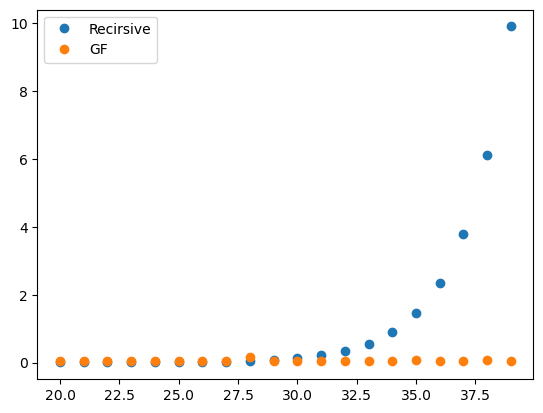

In [18]:
import time

# Store the time
RunTimeFibonacci, RunTimeFibonacciGF = [], []

# a = min, b = max
a = 20
b = 40

# Recursive
for n in range(a, b):
    time1 = time.process_time()
    Fibonacci(n)
    time2 = time.process_time()
    RunTimeFibonacci.append(time2-time1)

# Generative Function
for n in range(a, b):
    time1 = time.process_time()
    FibonacciGF(n)
    time2 = time.process_time()
    RunTimeFibonacciGF.append(time2-time1)

# Plot the result
N = range(a, b)
plt.plot(N, RunTimeFibonacci, 'o', label ='Recirsive')
plt.plot(N, RunTimeFibonacciGF, 'o', label ='GF')
plt.legend()
plt.show()

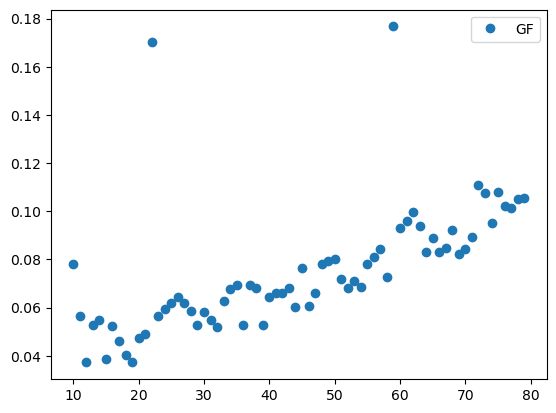

In [20]:
# Store the time
RunTimeFibonacciGF = []

# a = min, b = max
a = 10
b = 80

# Generative Function
for n in range(a, b):
    time1 = time.process_time()
    FibonacciGF(n)
    time2 = time.process_time()
    RunTimeFibonacciGF.append(time2-time1)

# Plot the result
N = range(a, b)
plt.plot(N, RunTimeFibonacciGF, 'o', label ='GF')
plt.legend()
plt.show()

**Answer:** The running time of the GF-algorithm seems linear while the runnig time of the recirsive functions looks exponential. For n>= 30 the GF-algorithm is faster.

## 2. Recurrence of order two and asymptotics

Let $j_n$ be defined by

$$
j_0 = 0,\\
j_1 = 1,\\
j_2 = 2,\\
j_n = 2j_{n-2} + 5 \;\;\;\; (for \; every \; n >= 3)
$$

**DO IT:** Find the expression for the generating function **J(x)** of the $j_n$'s. (We can ask **SymPy** to solve any equation)

**Answer:**  We multiply the last eq. by $x^n$ and sum the resulting expression for all n >= 3:

$$
\sum_{n>=3}j_nx^n = 2\sum_{n>=3}j_{n-2}x^n + 5\sum_{n>=3}x^n \\
J(x)-j_1x-j_2x^2 = 2 \sum_{p>=1}j_px^{p+2}+5(x^3+x^4+x^5+...) \;\;\; (we \; put \; n-2=p) \\
J(x)-x-2x^2 = 2x^2J(x)+5 \frac{x^3}{1-x}
$$

we can solve the last equation with the following script.

[SymPy 1.11 documentation](https://docs.sympy.org/latest/modules/solvers/solvers.html)

In [33]:
x = symbols('x')
j = symbols('j')

SeriesJ = solve(j-x-2*x**2-2*x**2*j-5*x**3/(1-x), j)

print(f'J(x) = {SeriesJ[0]}')

J(x) = x*(3*x**2 + x + 1)/(2*x**3 - 2*x**2 - x + 1)


Answer: we find

$$
J(x) = \frac{x(3x^2+x+1)}{2x^3-2x^2-x+1}
$$

**DO IT:** 

1. Write a function which extracts the n-th coefficient in **J(x)**
2. Compare your results with a recursive function which computes the $j_n$'s

In [39]:
def j_recursive(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    elif n==2:
        return 2
    else:
        return 2*j_recursive(n-2)+5
    
print(f'Recursive is: \n{[j_recursive(n) for n in range(1,15)]}')

Recursive is: 
[1, 2, 7, 9, 19, 23, 43, 51, 91, 107, 187, 219, 379, 443]


In [40]:
def j_GF(n):
    x = symbols('x')
    j = Function('j')
    j = x*(3*x**2+x+1)/(2*x**3-2*x**2-x+1)
    j_truncated = j.series(x, 0, n+1)
    return j_truncated.coeff(x**n)

print(f'Generative Function = \n{[j_GF(n) for n in range(1, 15)]}')

Generative Function = 
[1, 2, 7, 9, 19, 23, 43, 51, 91, 107, 187, 219, 379, 443]


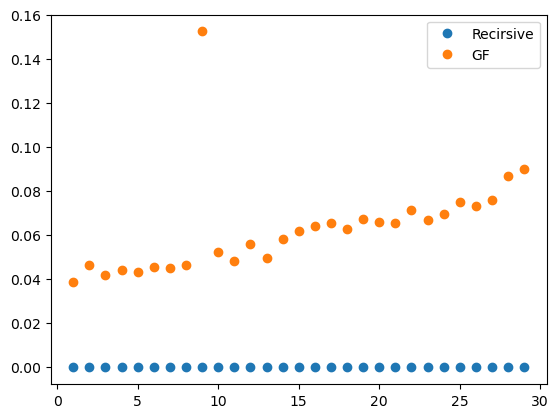

In [41]:
import time

# Store the time
RunRecursive, RunGenerative = [], []

# a = min, b = max
a = 1
b = 30

# Recursive
for n in range(a, b):
    time1 = time.process_time()
    j_recursive(n)
    time2 = time.process_time()
    RunRecursive.append(time2-time1)

# Generative Function
for n in range(a, b):
    time1 = time.process_time()
    j_GF(n)
    time2 = time.process_time()
    RunGenerative.append(time2-time1)

# Plot the result
N = range(a, b)
plt.plot(N, RunRecursive, 'o', label ='Recirsive')
plt.plot(N, RunGenerative, 'o', label ='GF')
plt.legend()
plt.show()

## 3. A pair of generating functions

Let $a_n, b_n$ be defined by $a_1 = b_1 = 1$ and, for every $n >= 1$,

$$
\left\{
    \begin{array}\\
        a_{n+1} = a_n+2b_n, \\
        b_{n+1} = a_n+b_n \\
    \end{array}
\right.
$$

$a_n, b_n \; are \; defined \;by \;(1+\sqrt{2})^n = a_n + b_n \sqrt{2}$

**Do IT:** 
1. Find a 2x2 system whose solutions are A(x), B(x), where A, B are the generating functions of sequences $(a_n)_{n>=1}, (b_n)_{n>=1}$ (Coefficients of this system should depend on x)

2. Solve this system with **solve** and write a script which uses function A to return $a_1, ..., a_{20}$

**Answer:** 
1. We multiply both terms of both equations in the last equations by $x^{n+1}$ and take the sum for n >= 1. we obtain

$$
\left\{
    \begin{array}\\
        \sum_{n>=1} a_{n+1}x^{n+1} = \sum_{n>=1}a_nx^{n+1} + 2\sum_{n>=1}b_nx^{n+1}, \\
        \sum_{n>=1} b_{n+1}x^{n+1} = \sum_{n>=1}a_nx^{n+1} + \sum_{n>=1}b_nx^{n+1} \\
    \end{array}
\right.
$$

We find

$$
\left\{
    \begin{array}\\
        A(x) - x = xA(x) + 2xB(x), \\
        B(x) - x = xA(x) + xB(x) \\
    \end{array}
\right.
$$

In the above script we solve this system of equations. We find

$$
\left\{
    \begin{array}\\
        A(x) = -\frac{x(x+1)}{x^2+2x-1}, \\
        B(x) = -\frac{x}{x^2+2x-1} \\
    \end{array}
\right.
$$

In [42]:
#------ Question 2
# We solve the system
var('A B x')
Solutions = solve([A-x-x*A-2*x*B, B-x-x*A-x*B], [A, B])
print(f'{Solutions} \n\n')

# We obtain the following expression:
FunctionA = -x*(x+1)/(x**2 + 2*x - 1)
FunctionB = -x/(x**2 + 2*x - 1)

print("A(x) = "+ str(FunctionA.series(x, 0, 10)))
print("\n\nB(x) = "+ str(FunctionB.series(x, 0, 10)) + "\n\n")

#We extract a_1, a_2, ...
N=20

A_truncated = FunctionA.series(x, 0, N+2)
FirstCoefficients = [A_truncated.coeff(x**n) for n in range(1, N+1)]
print(f'{FirstCoefficients} \n')

B_truncated = FunctionB.series(x, 0, N+2)
SecondCoefficients = [B_truncated.coeff(x**n) for n in range(1, N+1)]
print(SecondCoefficients)

{A: (-x**2 - x)/(x**2 + 2*x - 1), B: -x/(x**2 + 2*x - 1)} 


A(x) = x + 3*x**2 + 7*x**3 + 17*x**4 + 41*x**5 + 99*x**6 + 239*x**7 + 577*x**8 + 1393*x**9 + O(x**10)


B(x) = x + 2*x**2 + 5*x**3 + 12*x**4 + 29*x**5 + 70*x**6 + 169*x**7 + 408*x**8 + 985*x**9 + O(x**10)


[1, 3, 7, 17, 41, 99, 239, 577, 1393, 3363, 8119, 19601, 47321, 114243, 275807, 665857, 1607521, 3880899, 9369319, 22619537] 

[1, 2, 5, 12, 29, 70, 169, 408, 985, 2378, 5741, 13860, 33461, 80782, 195025, 470832, 1136689, 2744210, 6625109, 15994428]


## 4. Automatic decomposition of fractions

Generative functions are useful to decompose fractions like this:

$$
\frac{1-x+x^2}{(1-2x)(1-x)^2} = \frac{3}{1-2x} - \frac{1}{1-x} - \frac{1}{(1-x)^2}
$$

Let's see how to do that with SymPy.

### Exercises:

**DO IT:** The goal of the exercise is to find coefficients $\alpha, \beta, a, b, c$ such that

$$
A(x) = \frac{a}{x-\alpha} + \frac{b}{x - \beta} + c,
$$

where

$$
A(x) = \frac{-x(x+1)}{x^2 + 2x - 1}
$$

was defined in the previous exercise.

1. (Theory) Compute $\lim_{x \to +\infty} A(x) \; and \; deduce \; c,$
2. (Theory + SymPy) Use **SymPy** to find coeficients $\alpha, \beta$
3. (Theory + SymPy) Use **SymPy** again to find coefficients $a, b$

**Answer:** ***Question 1.*** Taking the limit $(x \to +\infty)$ in the equation

$$
\frac{a}{x-\alpha} + \frac{b}{x - \beta} + c = \frac{-x(x+1)}{x^2 + 2x - 1}
$$

yields 0 + 0 + c = -1

In [43]:
# Question 2
# We solve "denominator of A = 0" to find alpha, beta
var('x')
solve(x**2+2*x-1,x)

[-1 + sqrt(2), -sqrt(2) - 1]

**Answer:** ***Question 2.***

The short code above shows that

$$
A(x) = \frac{-x(x+1)}{x^2 + 2x - 1} = \frac{-x(x+1)}{(x-(\sqrt{2}-1))(x-(-\sqrt{2}-1))}
$$

So we must have that $\alpha = \sqrt{2}-1$ and $\beta = -\sqrt{2}-1$ (or the contrary) to ensure that A has the proper definition domain.

In [45]:
# Question 3
# We use A(1), A(0) to find a, b

var('a b alpha beta x')

alpha = -1+sqrt(2)
beta = -sqrt(2)-1

# Left-hand side:
def A_factorized(x):
    return -(x*(x+1))/(x**2+2*x-1)

# Right-hand side:
def A_decomposed(x, a, b, alpha, beta):
    return a/(x-alpha)+b/(x-beta)+(-1)

# We define a, b by solving the following system:
Solutions = solve([A_factorized(0)-A_decomposed(0, a, b, alpha, beta), 
                   A_factorized(1)-A_decomposed(1,a,b,alpha,beta)])
print(f'{Solutions} \n')
astar=Solutions[a]
bstar=Solutions[b]

# to get a nice formula
var('x')
print(latex(A_decomposed(x, astar, bstar, alpha, beta)))

{a: 1/2 - sqrt(2)/2, b: 1/2 + sqrt(2)/2} 

-1 + \frac{\frac{1}{2} - \frac{\sqrt{2}}{2}}{x - \sqrt{2} + 1} + \frac{\frac{1}{2} + \frac{\sqrt{2}}{2}}{x + 1 + \sqrt{2}}


**Answer:** ***Question 3.*** In order to find a, b we solve with the previous code the system

$$
\left\{
    \begin{array}\\
        A(0) = \frac{a}{0-\alpha} + \frac{b}{0 - \beta} + -1, \\
        A(1) = \frac{a}{1-\alpha} + \frac{b}{1 - \beta} + -1 \\
    \end{array}
\right.
$$

with $\alpha = \sqrt{2}-1$ and $\beta = -\sqrt{2}-1$ we find {b: 1/2 + sqrt(2)/(2), a, -sqrt(2)/(2) + 1/2} and finally:

$$
A(x) = -1 + \frac{-\frac{\sqrt(2)}{2} + \frac{1}{2}}{x-\sqrt(2)+1} + \frac{\frac{1}{2} + \frac{\sqrt(2)}{2}}{x+1+\sqrt(2)}
$$